# LOGISTIC REGRESSION #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os
import subprocess

In [2]:
titanic_train = pd.read_csv("C:\\Users\\venut\\Downloads\\Titanic_train.txt")
titanic_test = pd.read_csv("C:\\Users\\venut\\Downloads\\Titanic_test.txt")

In [3]:
print(titanic_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(titanic_train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
print(titanic_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
print(titanic_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
# Drop unnecessary columns
titanic_train = titanic_train.drop(["Name", "Ticket", "Cabin"], axis=1)

In [8]:
# Data preprocessing
warnings.filterwarnings("ignore")

# Fill missing values #

In [10]:
titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0], inplace=True)
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)

In [11]:
# outlier detection and removel using iqr method for age
Q1 = titanic_train["Age"].quantile(0.25)
Q3 = titanic_train["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_train = titanic_train[(titanic_train["Age"] >= lower_bound) & (titanic_train["Age"] <= upper_bound)]

In [12]:
Q1 = titanic_train["Fare"].quantile(0.25) # removel using iqr method for fare
Q3 = titanic_train["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
titanic_train = titanic_train[(titanic_train["Fare"] >= lower_bound) & (titanic_train["Fare"] <= upper_bound)]

# Boxplot #

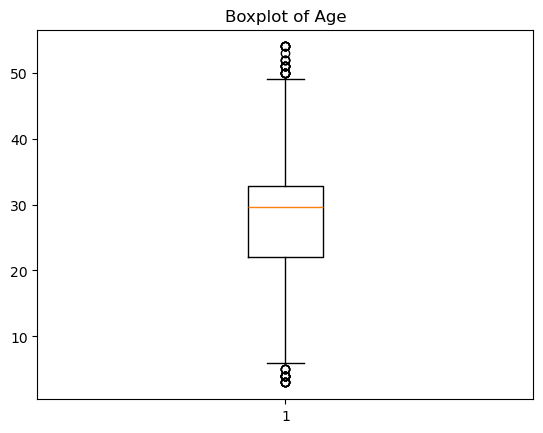

In [14]:
plt.boxplot(titanic_train["Age"])
plt.title("Boxplot of Age")
plt.show()

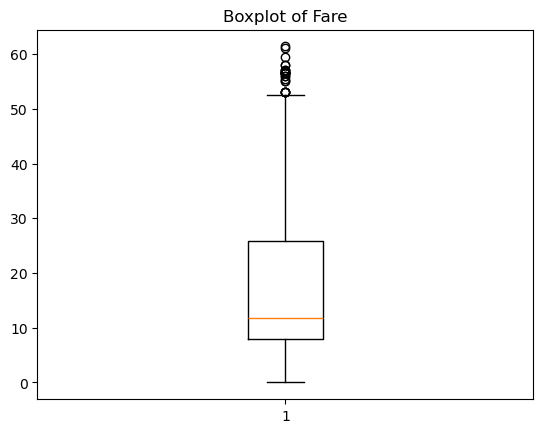

In [13]:
plt.boxplot(titanic_train["Fare"])
plt.title("Boxplot of Fare")
plt.show()

In [16]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder 

In [17]:
label_encoder = LabelEncoder()
titanic_train["Pclass"] = label_encoder.fit_transform(titanic_train["Pclass"])

In [18]:
label_encoder_sex = LabelEncoder()
titanic_train["Sex"] = label_encoder_sex.fit_transform(titanic_train["Sex"])

In [19]:
label_encoder_embarked = LabelEncoder()
titanic_train["Embarked"] = label_encoder_embarked.fit_transform(titanic_train["Embarked"])

In [20]:
# preprocessing test set
from sklearn import preprocessing

In [21]:
titanic_test = titanic_test.drop(["Name", "Ticket", "Cabin"], axis=1)
titanic_test["Pclass"] = label_encoder.fit_transform(titanic_test["Pclass"])
titanic_test["Sex"] = label_encoder_sex.transform(titanic_test["Sex"])
titanic_test["Embarked"] = label_encoder_embarked.transform(titanic_test["Embarked"])
titanic_test["Age"].fillna(titanic_test["Age"].mean(), inplace=True)
titanic_test["Fare"].fillna(titanic_test["Fare"].mean(), inplace=True)

# Data Visualization #

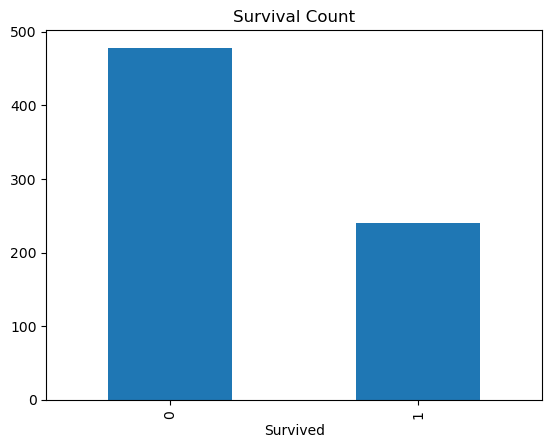

In [22]:
titanic_train["Survived"].value_counts().plot(kind="bar", title="Survival Count")
plt.show()

In [25]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [26]:
X = titanic_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = titanic_train["Survived"]

# Split data into train and test sets #

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [29]:
# Fit model on training data
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [32]:
# Predictions and evaluation
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred))

Accuracy: 75.00%
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        98
           1       0.61      0.59      0.60        46

    accuracy                           0.75       144
   macro avg       0.71      0.71      0.71       144
weighted avg       0.75      0.75      0.75       144



In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[81 17]
 [19 27]]


# ROC Curve #

In [34]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

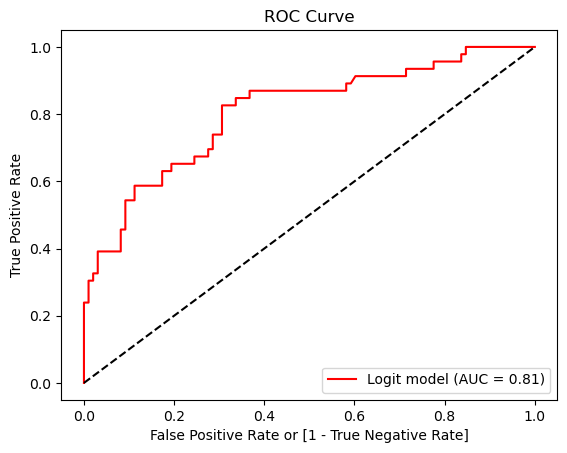

In [35]:
plt.plot(fpr, tpr, color='red', label='Logit model (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.show()

In [36]:
# Interpretation
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.8796087  -2.50423332 -0.04444846 -0.43097303 -0.07724881  0.02607593
 -0.30666148]
Intercept: 3.635241445001571


In [37]:
import statsmodels.api as sm

In [39]:
# Add a constant to the feature matrix for the intercept term
X_train_with_intercept = sm.add_constant(x_train)

In [40]:
# Fit the model using statsmodels
logit_model = sm.Logit(y_train, X_train_with_intercept)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.443465
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  574
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            7
Date:                Wed, 20 Aug 2025   Pseudo R-squ.:                  0.3067
Time:                        21:35:31   Log-Likelihood:                -254.55
converged:                       True   LL-Null:                       -367.18
Covariance Type:            nonrobust   LLR p-value:                 5.038e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8850      0.709      5.477      0.000       2.495       5.275
Pclass        -0.9349      0.

In [41]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [45]:
# Save the Streamlit app to a Python file
streamlit_code = """
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
titanic_train = pd.read_csv("/content/Titanic_train.csv")

# Preprocess the data (same as in the notebook)
titanic_train["Embarked"].fillna(titanic_train["Embarked"].mode()[0], inplace=True)
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace=True)

# Initialize LabelEncoders
label_encoder_sex = LabelEncoder()
titanic_train["Sex"] = label_encoder_sex.fit_transform(titanic_train["Sex"])

label_encoder_embarked = LabelEncoder()
titanic_train["Embarked"] = label_encoder_embarked.fit_transform(titanic_train["Embarked"])

# Prepare input data for prediction
X = titanic_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = titanic_train["Survived"]

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# Streamlit app
st.title('Titanic Survival Prediction App')
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['Male', 'Female'])
age = st.slider('Age', 1, 100)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 8)
parch = st.slider('Number of Parents/Children Aboard', 0, 6)
fare = st.slider('Fare Paid', 0, 500)
embarked = st.selectbox('Port of Embarkation', ['S', 'C', 'Q'])

# Convert input to the encoded format for the model
input_data = [
    pclass,
    label_encoder_sex.transform([sex.lower()])[0],
    age,
    sibsp,
    parch,
    fare,
    label_encoder_embarked.transform([embarked])[0]
]

if st.button('Predict Survival'):
    prediction = model.predict([input_data])[0]
    probability = model.predict_proba([input_data])[0][1]
    st.write(f"Prediction: {'Survived' if prediction == 1 else 'Did Not Survive'}")
    st.write(f"Probability of Survival: {probability:.2f}")
"""

In [46]:
# Save the Streamlit app code to a Python file
with open("titanic_app.py", "w") as f:
    f.write(streamlit_code)

In [47]:
# Step 6: Run the Streamlit app
def run_streamlit():
    subprocess.Popen(["streamlit", "run", "titanic_app.py"])

run_streamlit()

In [48]:
import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\venut\assigments excelr


In [50]:
print("Streamlit app is running. Open the link below in your web browser:")
print("http://localhost:8520")

Streamlit app is running. Open the link below in your web browser:
http://localhost:8520


# 1.Difference between precision and recall:

In [ ]:
PRECISION:
          measures the accuracy of positive predications.
          it shows how many predicted positives are actually positive.


RECALL:
       measures how well the model identifies all actual positives.
       it shows how many actual positives were correctly predicted.


# 2. what is cross-validation and its importance in binary classification? #

In [ ]:
CROSS-Validation:

   A technique were the dataset is split into k folds.the model is trained on k-1
   folds and tested on the remaing fold.thi precess is repeated k times.


IMPORTANCE:

       prevents overfitting by testing on different subsets.provides better model
       evaluation across various data splits.helps in hyperparameter tunning by offering reliable performance estimates.